In [2]:
import torch
import torchvision
from torch import nn
from d2l import torch as d2l
from torch.utils import data
from torchvision import transforms

In [3]:
batch_size = 256

def load_data_MNIST(batch_size,resize = None):  #@save
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.MNIST(root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.MNIST(root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=d2l.get_dataloader_workers()),
            data.DataLoader(mnist_test,batch_size,shuffle=True,num_workers=d2l.get_dataloader_workers()))

In [4]:
train_iter,test_iter = load_data_MNIST(batch_size)

test = enumerate(test_iter)
next(test)

(0,
 [tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          ...,
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0.,

In [5]:
net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [6]:
loss = nn.CrossEntropyLoss(reduction='none')

In [7]:
trainer = torch.optim.SGD(net.parameters(),lr = 0.1)

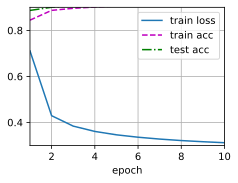

In [8]:
num_epochs = 10
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

In [9]:
def get_MNIST_labels(labels):
    text_labels = [1,2,3,4,5,6,7,8,9]
    return [text_labels[int(i)] for i in labels]

[tensor([8, 3, 7, 2, 5, 7, 2, 7, 8, 6, 6, 3, 2, 3, 3, 0, 7, 5, 2, 3, 1, 0, 5, 3,
        3, 8, 9, 6, 3, 8, 8, 1, 3, 2, 9, 8, 5, 1, 2, 4, 0, 4, 5, 6, 5, 0, 0, 3,
        0, 4, 4, 4, 6, 6, 8, 6, 2, 0, 3, 9, 1, 3, 9, 5, 8, 7, 7, 9, 5, 1, 4, 2,
        5, 3, 6, 4, 7, 2, 4, 6, 8, 4, 4, 2, 4, 8, 2, 6, 7, 0, 2, 2, 8, 6, 9, 2,
        9, 4, 1, 0, 0, 2, 3, 3, 5, 1, 1, 8, 7, 9, 2, 6, 9, 7, 6, 1, 0, 8, 0, 2,
        4, 7, 5, 1, 0, 6, 7, 9, 4, 5, 5, 9, 9, 8, 4, 3, 7, 7, 7, 0, 4, 4, 4, 6,
        8, 7, 1, 3, 8, 8, 9, 4, 5, 1, 4, 0, 9, 0, 9, 1, 5, 4, 4, 7, 4, 9, 4, 9,
        2, 3, 3, 6, 0, 7, 7, 0, 9, 4, 4, 3, 2, 4, 2, 1, 9, 4, 4, 6, 3, 4, 4, 0,
        5, 6, 1, 5, 5, 3, 1, 9, 1, 3, 9, 3, 4, 7, 6, 6, 6, 0, 8, 9, 5, 1, 4, 8,
        2, 6, 8, 6, 1, 9, 7, 1, 2, 8, 7, 7, 9, 8, 4, 3, 0, 2, 2, 5, 7, 1, 4, 6,
        3, 7, 1, 2, 7, 6, 2, 7, 1, 7, 7, 2, 9, 2, 6, 3])]


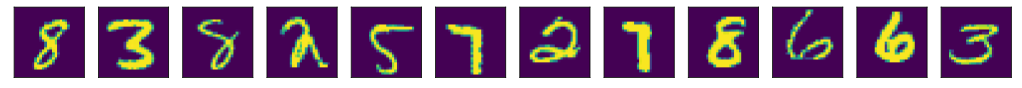

In [14]:
def predict_MNIST(net,test_iter,n = 12):
    for X,y in test_iter:
        break
    trues = y
    preds = [net(X).argmax(axis = 1)]
    d2l.show_images(X[0:n].reshape((n,28,28)),1,n)
    print(preds)

predict_MNIST(net,test_iter)